# Customer Churn Analysis

Submitted by: Sindhu Shree N

Batch Number: 1832

Main aim of this project is to predict the churn on the basis of given features.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_recall_curve,roc_curve
import pickle
import warnings
warnings.filterwarnings("ignore")

# Examining the data:

In [2]:
df=pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1573,5014-WUQMG,Male,0,Yes,Yes,47,Yes,No,Fiber optic,Yes,...,Yes,No,No,Yes,One year,Yes,Electronic check,96.10,4391.45,No
4216,2990-IAJSV,Male,0,No,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),92.00,6632.75,No
2223,8182-BJDSI,Female,0,No,No,28,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,89.95,2625.55,Yes
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
474,9399-APLBT,Female,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,74.7,Yes


We can observe that the dataset consist most of the categorical type data and some of them are numerical.

# Exploratory Data Analysis:

In [5]:
df.shape

(7043, 21)

The dataset consists 7043 rows and 20 features plus one target feature.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


So the dataset has 1 float-type, 2 integet-type and 18 object type data. 

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
#checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We can see that the dataset does not consist any null values.

In [5]:
#summary statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Since the above three features are the only numeric so we are getting only 3 rows.

We can observe that mean is greater than median in SeniorCitizen and tenure columns. But MonthlyCharges feature has a large difference between 75th percentile and maximum values.

In [11]:
#checking for unique values
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

So Partner feature contsins only two unique values.

In [12]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

Dependents feature also consist only two unique values.

In [13]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

The feature tenure contains many unique values as observed above

In [14]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Our target variable churn consists only two unique values.

# Data Visualization:

# Univariate Analysis:

<AxesSubplot:xlabel='gender', ylabel='count'>

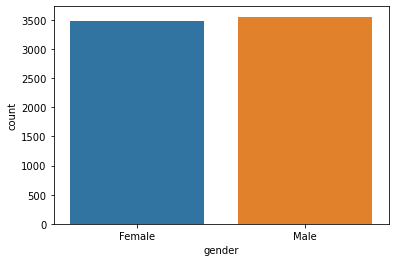

In [15]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='gender', ylabel='Count'>

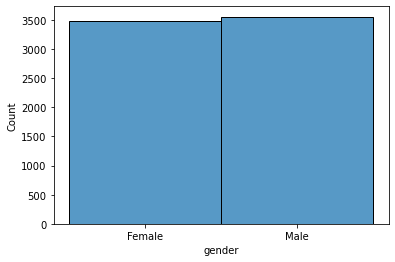

In [16]:
sns.histplot(df['gender'])

So data sistribution is not normal.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

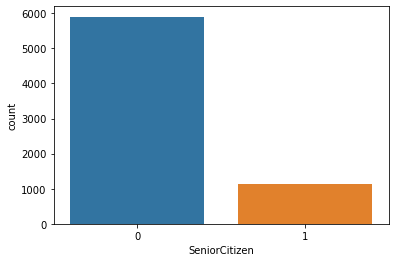

In [17]:
sns.countplot(df['SeniorCitizen'])

The count of SeniorCitizen is less than others and also data distribution is not normal.

<AxesSubplot:xlabel='tenure', ylabel='count'>

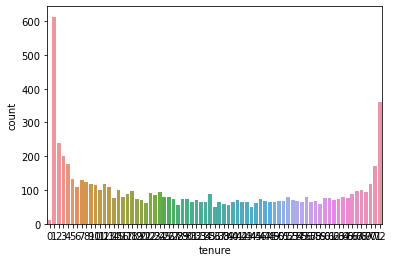

In [18]:
sns.countplot(df['tenure'])

<AxesSubplot:xlabel='tenure', ylabel='Count'>

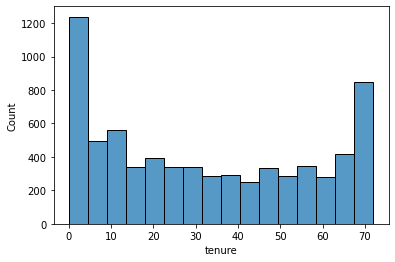

In [19]:
sns.histplot(df['tenure'])

Here also distribution of data is not normal.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

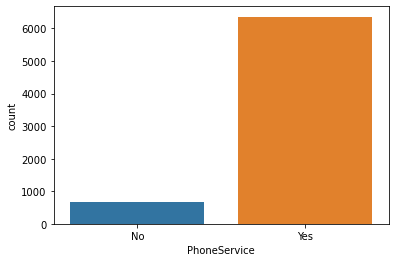

In [20]:
sns.countplot(df["PhoneService"])

<AxesSubplot:xlabel='Churn', ylabel='count'>

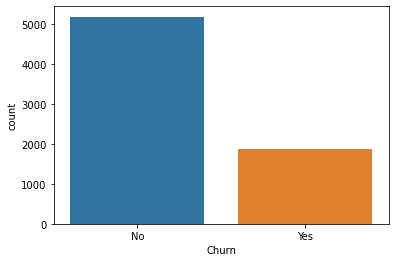

In [21]:
sns.countplot(df['Churn'])

Distribution of data is not normal.

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>]], dtype=object)

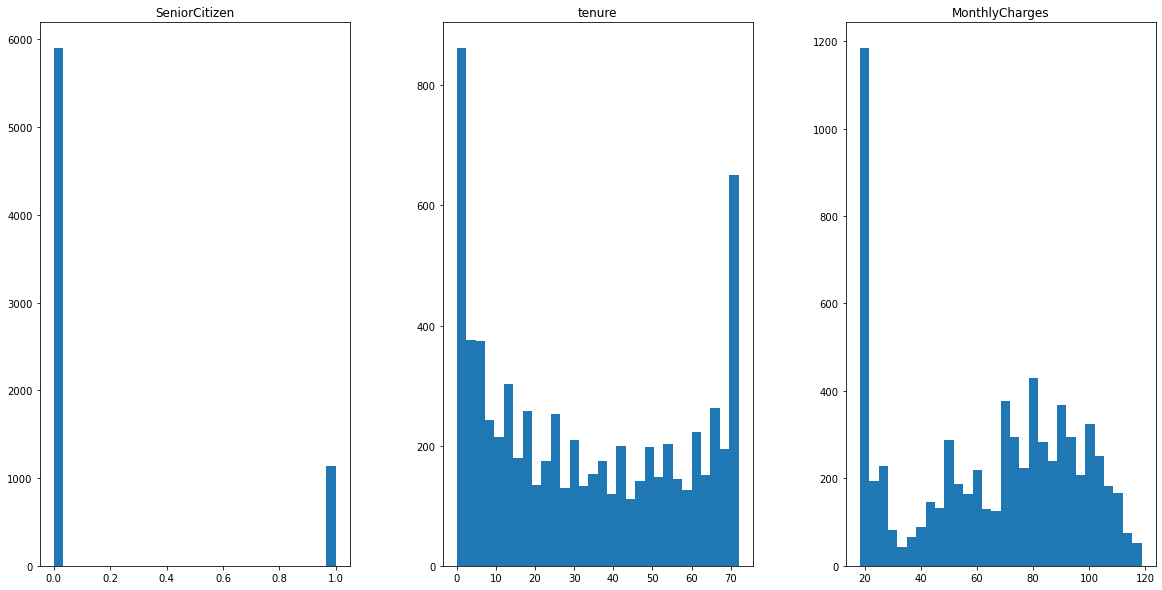

In [22]:
df.hist(figsize=(20,10),grid=False,layout=(1,3),bins=30)

# Bivariate Analysis:

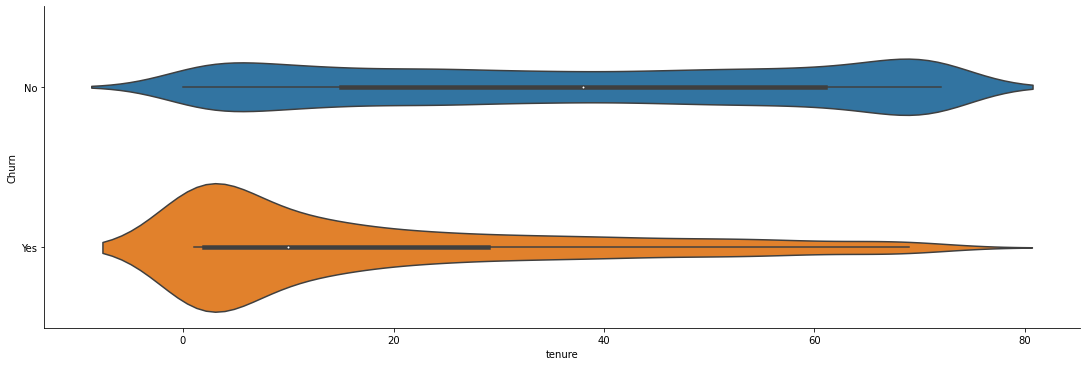

In [23]:
sns.catplot(x='tenure',y='Churn',data=df,kind='violin',aspect=3)

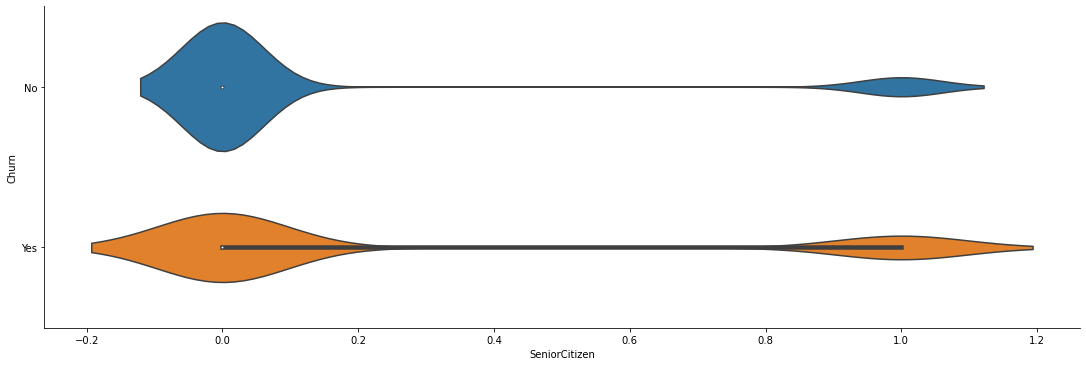

In [24]:
sns.catplot(x='SeniorCitizen',y='Churn',data=df,kind='violin',aspect=3)

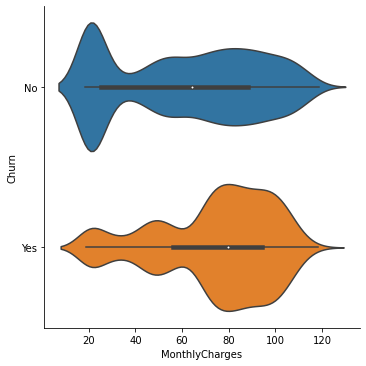

In [25]:
sns.catplot(x='MonthlyCharges',y='Churn',data=df,kind='violin')

# Multivariate Analysis:

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

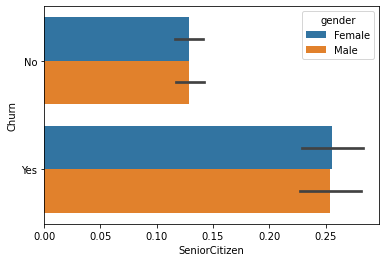

In [26]:
sns.barplot(x='SeniorCitizen',y='Churn',hue='gender',data=df)

We can see that 25% of SeniorCitizen are Churned.

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

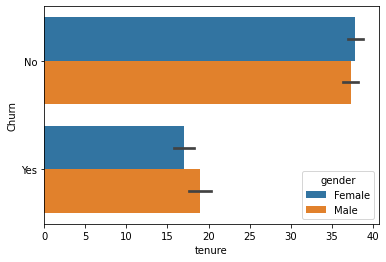

In [27]:
sns.barplot(x='tenure',y='Churn',hue='gender',data=df)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

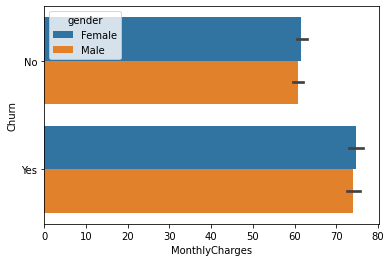

In [28]:
sns.barplot(x='MonthlyCharges',y='Churn',hue='gender',data=df)

<AxesSubplot:>

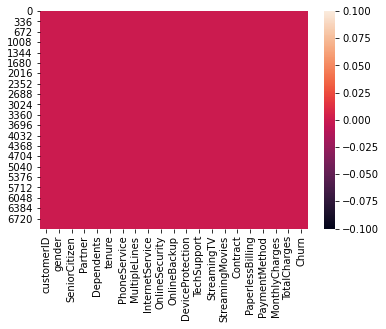

In [29]:
#visualizing null values using heatmap
sns.heatmap(df.isnull())

In [6]:
churn_numeric={'Yes':1,'No':0}
df.Churn.replace(churn_numeric,inplace=True)

In [7]:
#we will check the affects of features on churn 
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


The average Churn rate for males and females are approximatelt same which indicates gender variable does not bring a valuable prediction power to a model.So we can drop it from our dataset.

In [32]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [33]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [34]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [35]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [36]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


So all of above are having their own contribution to the target variable Churn which bring valuable prediction power to a model.

<AxesSubplot:xlabel='Contract', ylabel='count'>

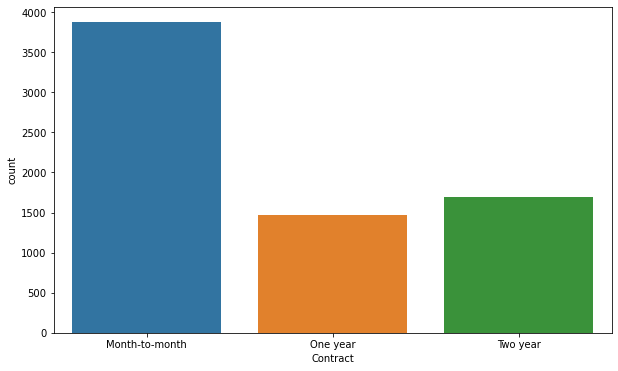

In [37]:
plt.figure(figsize=(10,6))
sns.countplot("Contract",data=df)

The customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long_term relationship with their customers.

# Correlation:

In [38]:
corr=df.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.150889
tenure,0.016567,1.000000,0.247900,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.193356
Churn,0.150889,-0.352229,0.193356,1.000000


<AxesSubplot:>

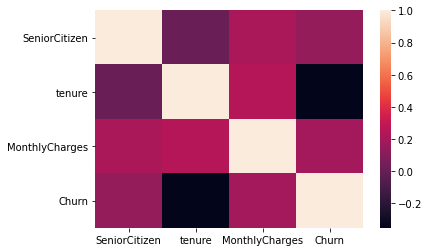

In [39]:
sns.heatmap(corr)

The dark shade shows a negative correlation here Churn is having a negative correlation with tenure.

# plotting Outliers:

<AxesSubplot:>

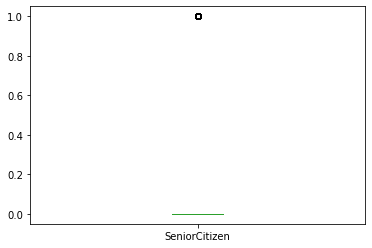

In [40]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

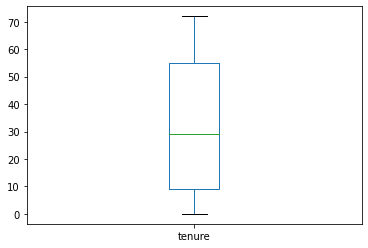

In [41]:
df['tenure'].plot.box()

<AxesSubplot:>

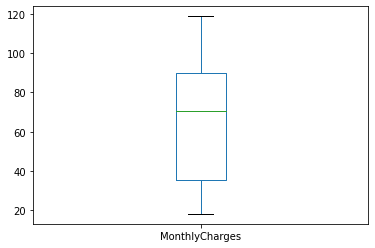

In [42]:
df['MonthlyCharges'].plot.box()

<AxesSubplot:>

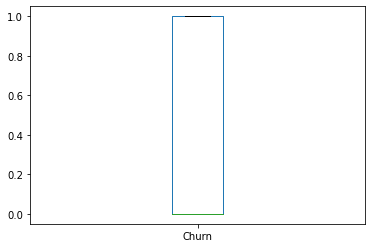

In [43]:
df['Churn'].plot.box()

# Checking normal distribution curve:

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

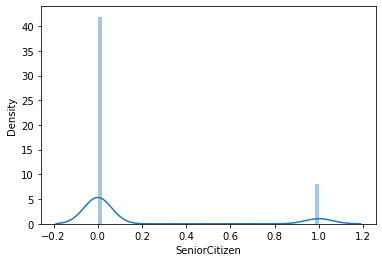

In [44]:
sns.distplot(df['SeniorCitizen'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

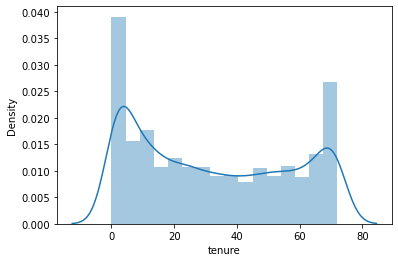

In [45]:
sns.distplot(df['tenure'])

By observing above we can say that most of the customers are either pretty new or have stayed for a long time with the company.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

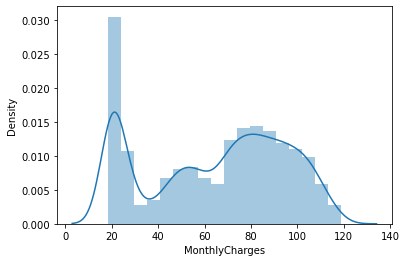

In [46]:
sns.distplot(df['MonthlyCharges'])

There is a large gap between low rates and high rates.

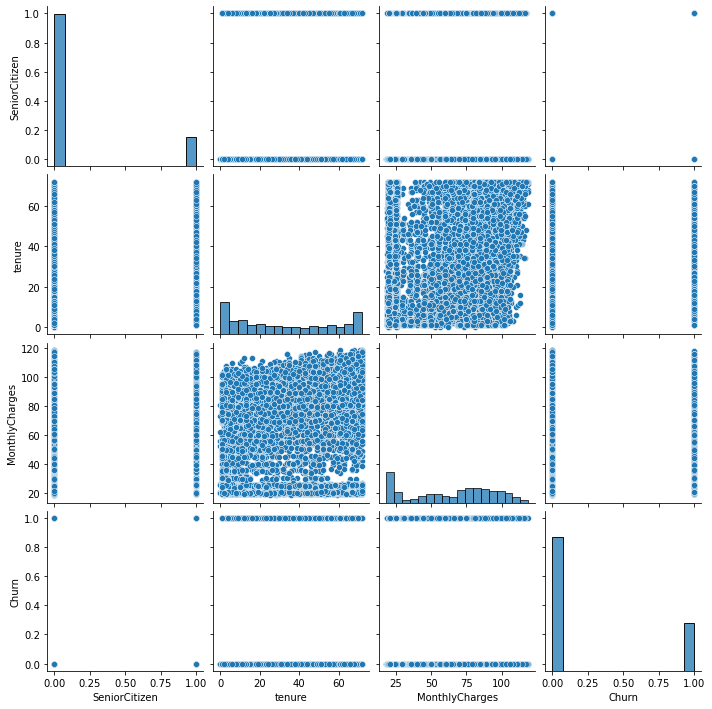

In [47]:
sns.pairplot(df)

So we will drop the features which are not much contributing to the target variable.

In [8]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'],axis=1,inplace=True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


# Removing Outliers:

In [9]:
z=np.abs(zscore(df[['SeniorCitizen']]))
z

array([[0.43991649],
       [0.43991649],
       [0.43991649],
       ...,
       [0.43991649],
       [2.27315869],
       [0.43991649]])

In [10]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [11]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(7043, 16)

# Encoding:

In [12]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
cat_features=['SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
              'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']
X=pd.get_dummies(df,columns=cat_features,drop_first=True)

In [13]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [14]:
#let's check the new dimension of the dataset
X.shape

(7043, 26)

# Scaling:

In [15]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
a=sc.fit_transform(df[['tenure']])
b=sc.fit_transform(df[['MonthlyCharges']])
X['tenure']=a
X['MonthyCharges']=b

# Resampling:

<AxesSubplot:xlabel='Churn', ylabel='count'>

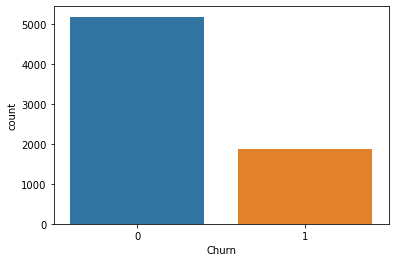

In [16]:
sns.countplot(df['Churn'])

So we can see that our target variable is not balanced so let us do upsampling.

In [17]:
X_no=X[X.Churn==0]
X_yes=X[X.Churn==1]

In [18]:
#Upsampling the positive class
X_yes_upsampled=X_yes.sample(n=len(X_no),replace=True,random_state=42)
print(len(X_yes_upsampled))

5174


combining positive and negative class and checking class distribution

<AxesSubplot:xlabel='Churn', ylabel='count'>

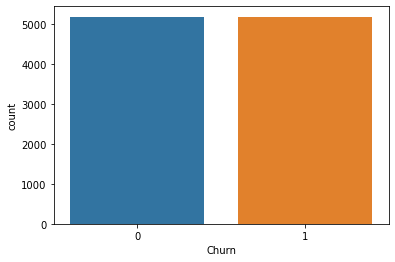

In [19]:
X_upsampled=X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn',data=X_upsampled)

Thus our target column is balanced after doing upsampling.

In [20]:
x=X_upsampled.drop('Churn',axis=1)
y=X_upsampled['Churn']

# Checking and removing skewness:

In [21]:
X.skew()

tenure                                   0.239540
MonthlyCharges                          -0.220524
Churn                                    1.063031
SeniorCitizen_1                          1.833633
Partner_Yes                              0.067922
Dependents_Yes                           0.875199
MultipleLines_No phone service           2.727153
MultipleLines_Yes                        0.316610
InternetService_Fiber optic              0.243494
InternetService_No                       1.375769
OnlineSecurity_No internet service       1.375769
OnlineSecurity_Yes                       0.943722
OnlineBackup_No internet service         1.375769
OnlineBackup_Yes                         0.652817
DeviceProtection_No internet service     1.375769
DeviceProtection_Yes                     0.657450
TechSupport_No internet service          1.375769
TechSupport_Yes                          0.924630
StreamingTV_No internet service          1.375769
StreamingTV_Yes                          0.475581


In [22]:
from sklearn.preprocessing import power_transform
power_transform(x,method='yeo-johnson')

array([[-1.30248588e+00, -1.30930400e+00, -4.88860588e-01, ...,
         1.19164538e+00, -5.13164506e-01, -1.28907271e+00],
       [ 4.90318168e-01, -4.13672424e-01, -4.88860588e-01, ...,
        -8.39175830e-01,  1.94869284e+00, -4.63051017e-01],
       [ 8.60910312e-01, -9.08993672e-01, -4.88860588e-01, ...,
        -8.39175830e-01, -5.13164506e-01, -9.29971139e-01],
       ...,
       [ 1.26562788e+00,  9.89332428e-01, -4.88860588e-01, ...,
         1.19164538e+00, -5.13164506e-01,  1.00239813e+00],
       [-1.22434129e+00, -6.71831043e-01, -4.88860588e-01, ...,
         1.19164538e+00, -5.13164506e-01, -7.09647721e-01],
       [-1.30248588e+00,  5.05147510e-02, -4.88860588e-01, ...,
        -8.39175830e-01,  1.94869284e+00, -1.59694550e-03]])

# Splitting the data:

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

using Classification methods:

# 1.Ridge Classifier:

In [66]:
from sklearn.linear_model import RidgeClassifier
ridge=RidgeClassifier()
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)
print("Ridge Classifier: \n\n",classification_report(y_test,y_pred_ridge))
print("Test Accuracy Of Ridge Classifier is:{}%".format(round(ridge.score(x_test,y_test)*100,2)))
#accuracy_score(y_train,y_pred_ridge)

Ridge Classifier: 

               precision    recall  f1-score   support

           0       0.78      0.75      0.76      1044
           1       0.75      0.78      0.77      1026

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070

Test Accuracy Of Ridge Classifier is:76.33%


In [67]:
print("confusion matrix for Ridge Classifier:","\n",confusion_matrix(y_test,y_pred_ridge))

confusion matrix for Ridge Classifier: 
 [[780 264]
 [226 800]]


# 2.Decision Tree Classifier:

In [68]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy Of Decision Tree Classifier is:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.95      0.81      0.88      1044
           1       0.84      0.96      0.89      1026

    accuracy                           0.89      2070
   macro avg       0.89      0.89      0.89      2070
weighted avg       0.89      0.89      0.88      2070

Test Accuracy Of Decision Tree Classifier is:88.55%


In [69]:
print("Confusion matrix of Decision Tree Classifier:","\n",confusion_matrix(y_test,y_pred_dt))

Confusion matrix of Decision Tree Classifier: 
 [[850 194]
 [ 43 983]]


# 3. KNeighbors Classifier:

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print(" KNN Classifier: \n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy:{}%".format(round(knn.score(x_test,y_test)*100,2)))

 KNN Classifier: 

               precision    recall  f1-score   support

           0       0.83      0.67      0.74      1044
           1       0.72      0.86      0.78      1026

    accuracy                           0.76      2070
   macro avg       0.77      0.76      0.76      2070
weighted avg       0.77      0.76      0.76      2070

Test Accuracy:76.38%


In [71]:
print("Confusion matrix of KNN Classifier:","\n",confusion_matrix(y_test,y_pred_knn))

Confusion matrix of KNN Classifier: 
 [[703 341]
 [148 878]]


# 4. Random Forest Classifier:

In [24]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.96      0.86      0.91      1044
           1       0.87      0.97      0.92      1026

    accuracy                           0.91      2070
   macro avg       0.92      0.91      0.91      2070
weighted avg       0.92      0.91      0.91      2070

Test Accuracy:91.21%


In [25]:
print("Confusion matrix of Random Forest Classifier:","\n",confusion_matrix(y_test,y_pred_rf))

Confusion matrix of Random Forest Classifier: 
 [[895 149]
 [ 33 993]]


# 5. XgBoost Classifier:

In [74]:
import xgboost as xgb
xg=xgb.XGBClassifier()
xg.fit(x_train,y_train)

[10:20:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
y_pred_xg=xg.predict(x_test)
print("XgBoost Classifier: \n\n",classification_report(y_test,y_pred_xg))
print("Test Accuracy:{}%".format(round(xg.score(x_test,y_test)*100,2)))

XgBoost Classifier: 

               precision    recall  f1-score   support

           0       0.90      0.80      0.85      1044
           1       0.82      0.91      0.86      1026

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

Test Accuracy:85.56%


In [76]:
print("Confusion matrix of xgboost Classifier:","\n",confusion_matrix(y_test,y_pred_xg))

Confusion matrix of xgboost Classifier: 
 [[833 211]
 [ 88 938]]


# Cross validation score:

In [77]:
print(cross_val_score(ridge,x,y,cv=5).mean()*100)

75.58943502310389


In [78]:
print(cross_val_score(dt,x,y,cv=5).mean()*100)

87.321364611717


In [79]:
print(cross_val_score(knn,x,y,cv=5).mean()*100)

76.36254999614741


In [26]:
print(cross_val_score(rf,x,y,cv=5).mean()*100)

89.95946605398765


So on comparing the test accuracy and the cross validation we can observe that all accuracy scores are very similar to the cross validation scores.
And Random Forest classifier is giving the best accuracy_percentage of 90.97 with cross validation score 90.18. So it is the perfict fit for the present model.So let us tune it.

# Hyper Parameter Tuning:

Inorder to improve the accuracy we will tune the model using hyper parameters.

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
#passing five parameters for tuning
parameters={'n_estimators':[20,30],
            'max_depth':[20,25],
            'criterion':['gini','entropy'],
            'min_samples_split':[2,6],
            'min_samples_leaf':[1,4]}
            
grid=GridSearchCV(estimator=rf, param_grid=parameters,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 6],
                         'n_estimators': [20, 30]})

In [29]:
best_parameters=grid.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


In [30]:
(grid.best_score_)*100

87.89570471561802

In [31]:
clf=RandomForestClassifier(n_estimators=20,max_depth=25,criterion='gini',min_samples_split=2,min_samples_leaf=1)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=20)

In [32]:
clf.score(x_test,y_test)*100

90.96618357487922

We can see that the model is giving a good accuracy even without tuning it. So the perfect accuracy score is 89%.

# AUC ROC curve:

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [34]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)[:,1]
y_pred_prob

array([1.  , 0.08, 0.97, ..., 0.08, 0.01, 0.98])

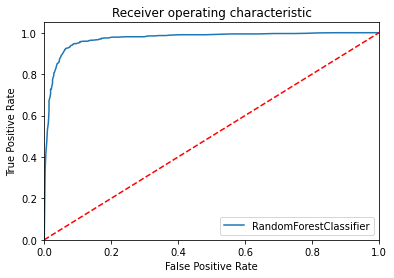

In [35]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
fpr,tpr,thersholds = roc_curve(y_test,rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='RandomForestClassifier'%rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

# Further Evaluation:

In [36]:
Final_mod=RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print(rf.score(x_test,y_test)*100)

90.8695652173913


# Saving the best model:

In [37]:
import pickle
filename = 'Finalmodel.pkl'
pickle.dump(Final_mod, open(filename,"wb"))
print("Model saved")

Model saved


# Conclusion:

In [38]:
result=pd.DataFrame({})
preds=rf.predict(x_test)
result['Predicted Churn']=preds
result['Actual Churn']=y_test.values
result.sample(20)

,Predicted Churn,Actual Churn
822,0,0
943,0,0
478,1,1
1038,0,1
723,1,1
100,0,0
321,0,0
1554,0,0
1982,1,1
1128,1,1


Thus the train and test data are balanced with having a good accuracy.